<a href="https://colab.research.google.com/github/NDBao08/ThucHanh02/blob/ph%C6%B0%C6%A1ng/HMMtruy%E1%BB%81nth%E1%BB%91ng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a = (2251262580%15+1)
a

1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install hmmlearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

df = pd.read_csv(r"/content/EW-MAX.csv")

df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [ ]:
# 2. Xử lý thời gian và tính log return
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)
df['LogReturn'] = np.log(df['Adj_Close'] / df['Adj_Close'].shift(1))
df.dropna(inplace=True)

In [ ]:
# 3. Đưa dữ liệu vào mô hình HMM
X = df[['LogReturn']].values

# 4. Huấn luyện mô hình HMM với 2 trạng thái
model = GaussianHMM(n_components=2, covariance_type='full', n_iter=100, random_state=42)
model.fit(X)

# 5. Dự đoán chuỗi trạng thái ẩn
hidden_states = model.predict(X)
df['HiddenState'] = hidden_states
df['HiddenState'].unique()

array([1, 0])

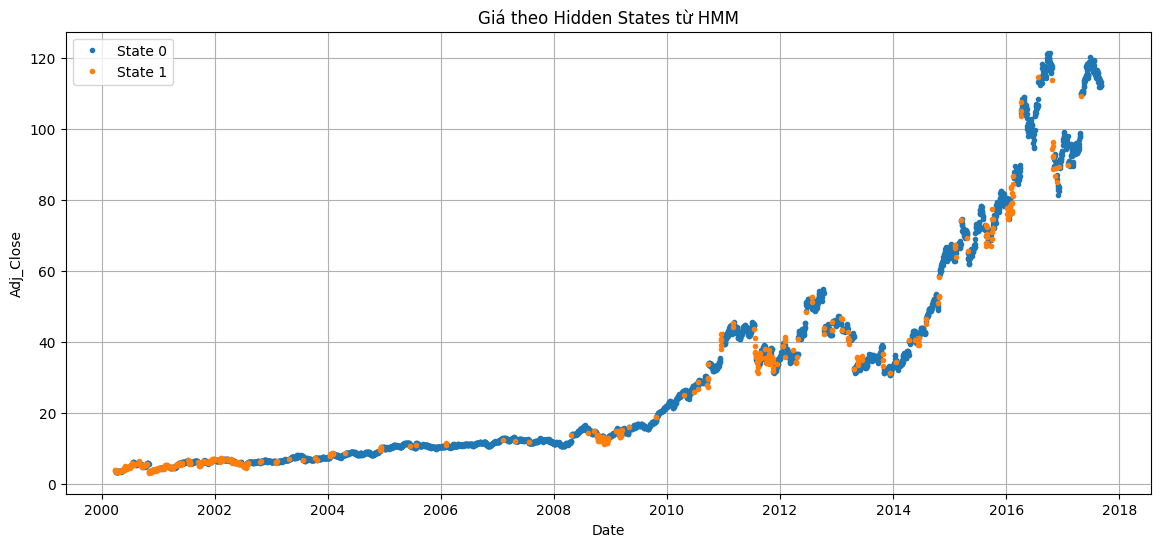

In [ ]:
# 6. Vẽ biểu đồ theo Hidden State
plt.figure(figsize=(14,6))
for state in range(model.n_components):
    state_mask = df['HiddenState'] == state
    plt.plot(df['Date'][state_mask], df['Adj_Close'][state_mask], '.', label=f'State {state}')
plt.legend()
plt.title("Giá theo Hidden States từ HMM")
plt.xlabel("Date")
plt.ylabel("Adj_Close")
plt.grid(True)
plt.show()

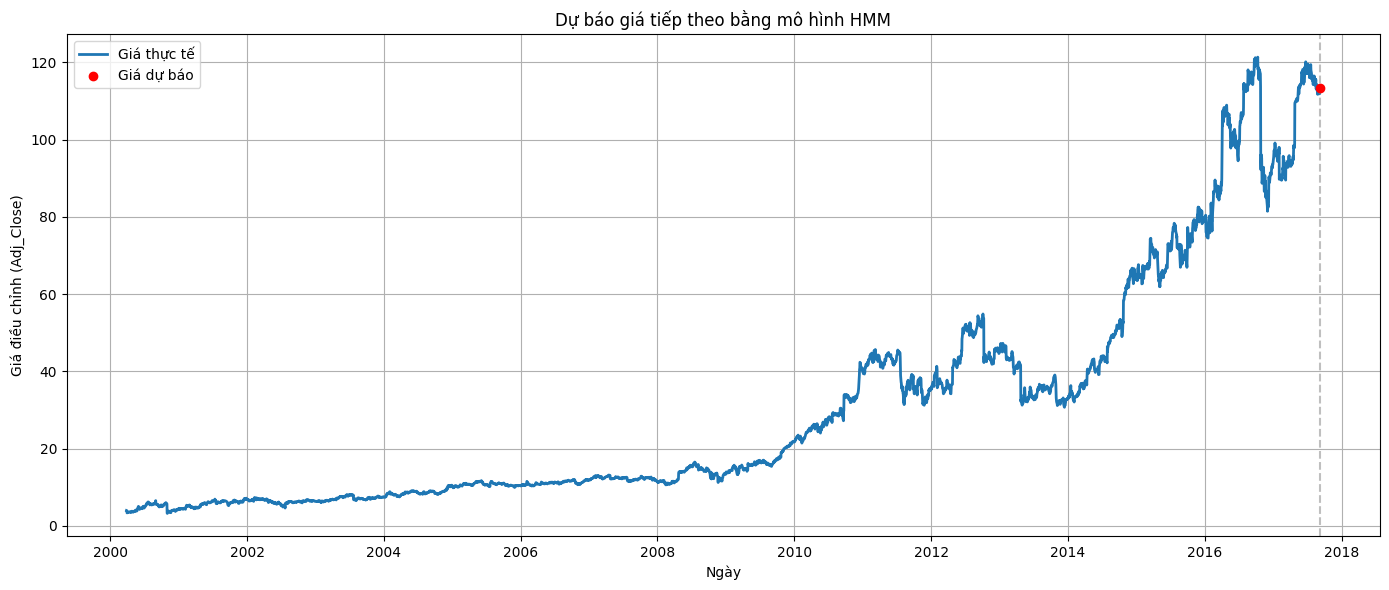

 Giá hiện tại: 113.19
 Dự báo log return tiếp theo: 0.00079
 Dự báo giá tiếp theo (2017-09-09): 113.28


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Dự báo log return tiếp theo từ HMM
current_state = df['HiddenState'].iloc[-1]
next_state_probs = model.transmat_[current_state]
state_means = model.means_.flatten()
expected_log_return = np.dot(next_state_probs, state_means)

# 2. Dự báo giá tiếp theo
last_price = df['Adj_Close'].iloc[-1]
forecast_price = last_price * np.exp(expected_log_return)

# 3. Gắn giá dự báo vào DataFrame
forecast_date = df['Date'].iloc[-1] + pd.Timedelta(days=1)
df_forecast = pd.DataFrame({
    'Date': [forecast_date],
    'Adj_Close': [forecast_price],
    'Forecast': [True]
})
df['Forecast'] = False
df_combined = pd.concat([df, df_forecast], ignore_index=True)

# 4. Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(df_combined['Date'], df_combined['Adj_Close'], label='Giá thực tế', linewidth=2)
plt.scatter(forecast_date, forecast_price, color='red', label='Giá dự báo', zorder=5)
plt.axvline(forecast_date, color='gray', linestyle='--', alpha=0.5)

plt.title("Dự báo giá tiếp theo bằng mô hình HMM")
plt.xlabel("Ngày")
plt.ylabel("Giá điều chỉnh (Adj_Close)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. In ra dự báo
print(f" Giá hiện tại: {last_price:,.2f}")
print(f" Dự báo log return tiếp theo: {expected_log_return:.5f}")
print(f" Dự báo giá tiếp theo ({forecast_date.date()}): {forecast_price:,.2f}")
